# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries

import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.01)

y = weight * X + bias
# Make X and y using linear regression feature


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [4]:
# Split the data into training and testing
# Split the data into training and testing
train_slpit_index = int(len(X) * 0.8)
X_train = X[:train_slpit_index]
y_train = y[:train_slpit_index]
X_test = X[train_slpit_index:]
y_test = y[train_slpit_index:]

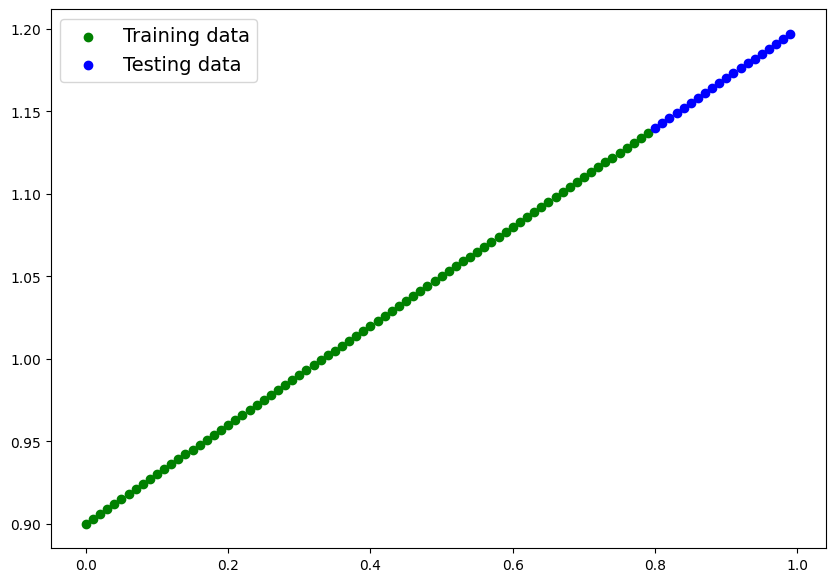

In [5]:
# Plot the training and testing data
# Plot the training and testing data
def plot_func(X_train, y_train, X_test, y_test, predictions):
    plt.figure(figsize=(10,7))
    plt.scatter(X_train, y_train, c="g",label="Training data")
    plt.scatter(X_test, y_test, c="b",label="Testing data")
    if predictions is not None:
      plt.scatter(X_test, predictions, c="r", s=4, label="Predictions")
      # Show the legend
    plt.legend(prop={"size": 14});
    plt.show()

plot_func(X_train, y_train, X_test, y_test,None)


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
# Create PyTorch linear regression model by subclassing nn.Module
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <

In [7]:
# Instantiate the model and put it to the target device
torch.manual_seed(1)
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model = LinearRegressionModel()
# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model.parameters())

[Parameter containing:
 tensor([0.6614], requires_grad=True),
 Parameter containing:
 tensor([0.2669], requires_grad=True)]

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [8]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()
optim = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [16]:
# Training loop
torch.manual_seed(1)
epochs = 300

# Train model for 300 epochs


# Send data to target device
loss =[]
test_loss = []
epoches_list = []

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  predicton = model(X_train)

  # 2. Calculate loss
  loss = loss_function(predicton, y_train)

  # 3. Zero gradients
  optim.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optim.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context

      # 1. Forward pass
      predicton = model.forward(X_test)
      # 2. Calculate test loss
      test_loss = loss_function(predicton, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.014 | Test loss: 0.033
Epoch: 20 | Train loss: 0.008 | Test loss: 0.017
Epoch: 40 | Train loss: 0.009 | Test loss: 0.000
Epoch: 60 | Train loss: 0.009 | Test loss: 0.000
Epoch: 80 | Train loss: 0.009 | Test loss: 0.000
Epoch: 100 | Train loss: 0.009 | Test loss: 0.000
Epoch: 120 | Train loss: 0.009 | Test loss: 0.000
Epoch: 140 | Train loss: 0.009 | Test loss: 0.000
Epoch: 160 | Train loss: 0.009 | Test loss: 0.000
Epoch: 180 | Train loss: 0.009 | Test loss: 0.000
Epoch: 200 | Train loss: 0.009 | Test loss: 0.000
Epoch: 220 | Train loss: 0.009 | Test loss: 0.000
Epoch: 240 | Train loss: 0.009 | Test loss: 0.000
Epoch: 260 | Train loss: 0.009 | Test loss: 0.000
Epoch: 280 | Train loss: 0.009 | Test loss: 0.000


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [17]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([1.1524, 1.1555, 1.1586, 1.1617, 1.1648, 1.1678, 1.1709, 1.1740, 1.1771,
        1.1802, 1.1833, 1.1864, 1.1895, 1.1925, 1.1956, 1.1987, 1.2018, 1.2049,
        1.2080, 1.2111])

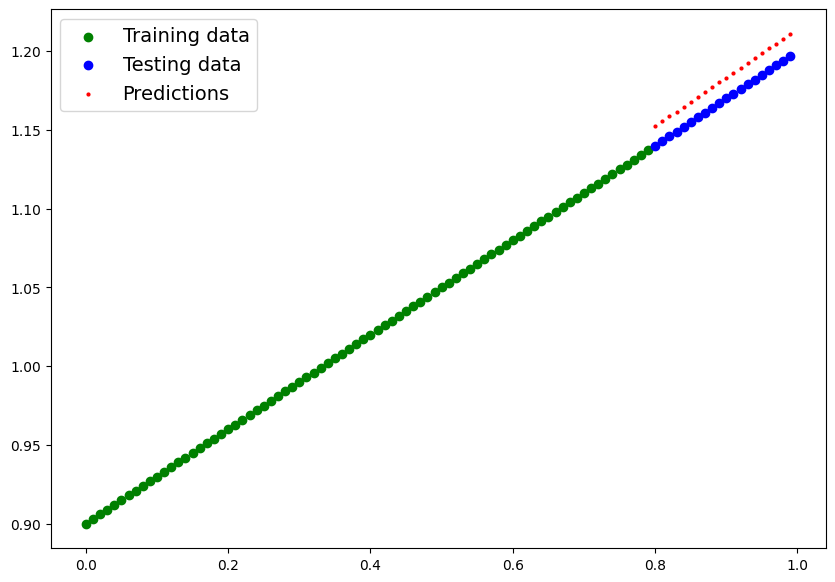

In [18]:
# Plot the predictions (these may need to be on a specific device)
plot_func(X_train, y_train, X_test, y_test, y_preds)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [19]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0_hw.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0_hw.pth


In [13]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [14]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) #

In [15]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])